In [11]:
import numpy as np
import torch
import sys
from matplotlib import pyplot as plt
import torch.nn as nn
import time
from numba import cuda
from tqdm import tqdm, trange
import os
import pyroc
import pandas as pd
import gc
from IPython.display import clear_output
import pickle, hickle

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  
device = torch.device("cuda:0")
dtype = torch.float32
torch.manual_seed(42)
np.random.seed(42)


In [10]:
with open('./RFM/pval_data/pval_dict.pkl', 'rb') as f:
    pval_dict = pickle.load(f)

In [19]:
ns = [1300000, 1000000, 700000, 400000, 200000, 50000]
ps = []
for n in ns:
    ps.append(pval_dict['RFM']['soft'][n]['mean'])

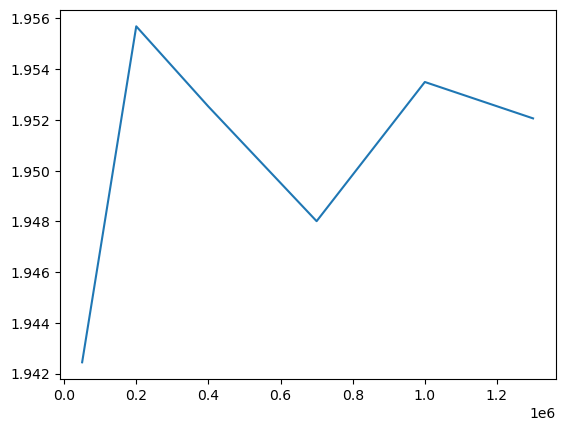

In [20]:
plt.plot(ns,ps)

# Draw p-n


In [3]:
ns = np.array([1300000, 1000000, 700000, 400000, 200000, 50000])
ps_L = np.zeros(ns.shape[0])
ps_G = np.zeros(ns.shape[0])
ps_O = np.zeros(ns.shape[0])
ps_S = np.zeros(ns.shape[0])
ps_B = np.zeros(ns.shape[0])
ps_L_std = np.zeros(ns.shape[0])
ps_G_std = np.zeros(ns.shape[0])
ps_O_std = np.zeros(ns.shape[0])
ps_S_std = np.zeros(ns.shape[0])
ps_B_std = np.zeros(ns.shape[0])
ps_L_thres = np.zeros(ns.shape[0])
ps_G_thres = np.zeros(ns.shape[0])
ps_O_thres = np.zeros(ns.shape[0])
ps_S_thres = np.zeros(ns.shape[0])
ps_L_thres_std = np.zeros(ns.shape[0])
ps_G_thres_std = np.zeros(ns.shape[0])
ps_O_thres_std = np.zeros(ns.shape[0])
ps_S_thres_std = np.zeros(ns.shape[0])
ps_S_thres_5 = np.zeros(ns.shape[0])
ps_S_thres_5_std = np.zeros(ns.shape[0])

ps_R = np.zeros(ns.shape[0])
ps_R_std = np.zeros(ns.shape[0])
ps_R_thres = np.zeros(ns.shape[0])
ps_R_thres_std = np.zeros(ns.shape[0])

for i in range(len(ns)):
    n = ns[i]

    temp = np.load('./Mix/%d_soft.npy'%n)
    ps_L[i] = np.mean(temp)
    ps_L_std[i] = np.std(temp)
    temp = np.load('./Mix/%d_hard.npy'%n)
    ps_L_thres[i] = np.mean(temp)
    ps_L_thres_std[i] = np.std(temp)

    temp = np.load('./Fea_Gau/%d_soft.npy'%n)
    ps_G[i] = np.mean(temp)
    ps_G_std[i] = np.std(temp)
    temp = np.load('./Fea_Gau/%d_hard.npy'%n)
    ps_G_thres[i] = np.mean(temp)
    ps_G_thres_std[i] = np.std(temp)

    temp = np.load('./Gaussian/%d_soft.npy'%n)
    ps_O[i] = np.mean(temp)
    ps_O_std[i] = np.std(temp)
    temp = np.load('./Gaussian/%d_hard.npy'%n)
    ps_O_thres[i] = np.mean(temp)
    ps_O_thres_std[i] = np.std(temp)

    temp = np.load('./Scheffe/%d_soft.npy'%n)
    ps_S[i] = np.mean(temp)
    ps_S_std[i] = np.std(temp)
    temp = np.load('./Scheffe/%d_hard.npy'%n)
    ps_S_thres[i] = np.mean(temp)
    ps_S_thres_std[i] = np.std(temp)

    temp = np.load('./Scheffe/%d_05.npy'%n)
    ps_S_thres_5[i] = np.mean(temp)
    ps_S_thres_5_std[i] = np.std(temp)

    temp = np.load('./Res_Net/%d_soft.npy'%n)
    ps_R[i] = np.mean(temp)
    ps_R_std[i] = np.std(temp)
    temp = np.load('./Res_Net/%d_hard.npy'%n)
    ps_R_thres[i] = np.mean(temp)
    ps_R_thres_std[i] = np.std(temp)

    temp = np.load('./LBI/%d_soft.npy'%n)
    ps_B[i] = np.mean(temp)
    ps_B_std[i] = np.std(temp)



FileNotFoundError: [Errno 2] No such file or directory: './Mix/1300000_soft.npy'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ns = np.array([1300000, 1000000, 700000, 400000, 200000, 50000])
def load_pval_mean_var(ns):
    pval_dict = {
        'Res_Net_soft':{'data': {}},
        'Res_Net_hard':{'data': {}},
        'Mix_soft':{'data': {}},
        'Mix_hard':{'data': {}},
        'LBI_soft':{'data': {}},
        # 'LBI_hard':{},
        'Fea_Gau_soft':{'data': {}},
        'Fea_Gau_hard':{'data': {}},
        'Gaussian_soft':{'data': {}},
        'Gaussian_hard':{'data': {}},
        'Scheffe_soft':{'data': {}},
        'Scheffe_hard':{'data': {}},
        'Scheffe_05':{'data': {}},
        'UME_soft':{'data': {}},
        'UME_hard':{'data': {}},
    }

    for n in ns:
        pval_dict['Res_Net_soft']['data'][n] = np.load('./Res_Net/%d_soft.npy'%n)
        pval_dict['Res_Net_hard']['data'][n] = np.load('./Res_Net/%d_hard.npy'%n)
        pval_dict['Mix_soft']['data'][n] = np.load('./Mix/%d_soft.npy'%n)
        pval_dict['Mix_hard']['data'][n] = np.load('./Mix/%d_hard.npy'%n)
        pval_dict['LBI_soft']['data'][n] = np.load('./LBI/%d_soft.npy'%n)
        # pval_dict['LBI_hard'][n] = np.load('./LBI/%d_hard.npy'%n)
        pval_dict['Fea_Gau_soft']['data'][n] = np.load('./Fea_Gau/%d_soft.npy'%n)
        pval_dict['Fea_Gau_hard']['data'][n] = np.load('./Fea_Gau/%d_hard.npy'%n)
        pval_dict['Gaussian_soft']['data'][n] = np.load('./Gaussian/%d_soft.npy'%n)
        pval_dict['Gaussian_hard']['data'][n] = np.load('./Gaussian/%d_hard.npy'%n)
        pval_dict['Scheffe_soft']['data'][n] = np.load('./Scheffe/%d_soft.npy'%n)
        pval_dict['Scheffe_hard']['data'][n] = np.load('./Scheffe/%d_hard.npy'%n)
        pval_dict['Scheffe_05']['data'][n] = np.load('./Scheffe/%d_05.npy'%n)
        pval_dict['UME_soft']['data'][n] = np.load('./UME/pval_data/n_tr=%d_soft.npy'%n)
        pval_dict['UME_hard']['data'][n] = np.load('./UME/pval_data/n_tr=%d_hard.npy'%n)

    for key in pval_dict.keys():
        pval_dict[key]['mean'] = np.zeros(len(ns))
        pval_dict[key]['std'] = np.zeros(len(ns))
        for i,n in enumerate(ns):
            pval_dict[key]['mean'][i] = np.mean(pval_dict[key]['data'][n])
            pval_dict[key]['std'][i] = np.std(pval_dict[key]['data'][n])
    return pval_dict
pval_dict = load_pval_mean_var(ns)

# Plot

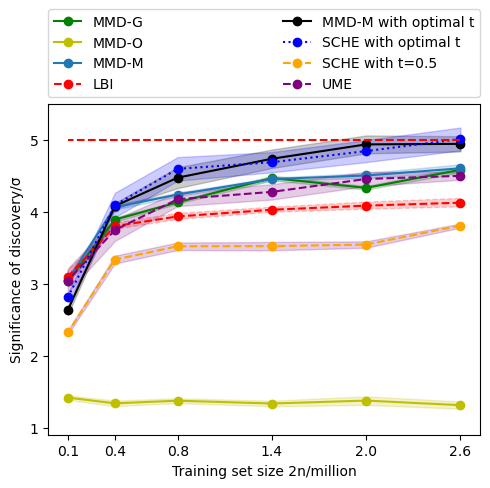

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
ns = np.array([1300000, 1000000, 700000, 400000, 200000, 50000])
fig = plt.figure(figsize=(5, 5))
# plt.plot(ns, ps_L, label='MMD-M', marker='o', alpha=0.99, color=colors[3], linestyle='-.')
# plt.fill_between(ns, ps_L-ps_L_std, ps_L+ps_L_std, alpha=0.2, color=colors[3])

plt.plot(ns, ps_G, label='MMD-G', marker='o', alpha=0.99, color=colors[1])
plt.fill_between(ns, ps_G-ps_G_std, ps_G+ps_G_std, alpha=0.2, color=colors[1])

plt.plot(ns, ps_O, label='MMD-O', marker='o', alpha=0.99, color=colors[5])
plt.fill_between(ns, ps_O-ps_O_std, ps_O+ps_O_std, alpha=0.2, color=colors[5])

plt.plot(ns, ps_R, label='MMD-M', marker='o', alpha=0.99, color='C0')
plt.fill_between(ns, ps_R-ps_R_std, ps_R+ps_R_std, alpha=0.2, color='C0')

plt.plot(ns, ps_B, label='LBI', marker='o', alpha=0.99, color=colors[0], linestyle='--')
plt.fill_between(ns, ps_B-ps_B_std, ps_B+ps_B_std, alpha=0.2, color=colors[0], linestyle='--')

# plt.plot(ns, ps_L_thres, label='MMD-M with optimal t', marker='o', alpha=0.99, color=colors[4], linestyle='-.')
# plt.fill_between(ns, ps_L_thres-ps_L_thres_std, ps_L_thres+ps_L_thres_std, alpha=0.2, color=colors[4], linestyle='-.')

# plt.plot(ns, ps_G_thres, label='MMD-G with optimal t', marker='o', alpha=0.99, color='C2', linestyle=':')
# plt.fill_between(ns, ps_G_thres-ps_G_thres_std, ps_G_thres+ps_G_thres_std, alpha=0.2, color='C2')

plt.plot(ns, ps_R_thres, label='MMD-M with optimal t', marker='o', alpha=0.99, color='k')
plt.fill_between(ns, ps_R_thres-ps_R_thres_std, ps_R_thres+ps_R_thres_std, alpha=0.2, color='k')

# plt.plot(ns, ps_O_thres, label='MMD-O with optimal t', marker='o', alpha=0.9, color='pink')
# plt.fill_between(ns, ps_O_thres-ps_O_thres_std, ps_O_thres+ps_O_thres_std, alpha=0.2, color='pink')

plt.plot(ns, ps_S_thres, label='SCHE with optimal t', marker='o', alpha=0.99, color=colors[2], linestyle=':')
plt.fill_between(ns, ps_S_thres-ps_S_thres_std, ps_S_thres+ps_S_thres_std, alpha=0.2, color=colors[2])

plt.plot(ns, ps_S_thres_5, label='SCHE with t=0.5', marker='o', alpha=0.99, color='orange', linestyle='--')
plt.fill_between(ns, ps_S_thres_5-ps_S_thres_5_std, ps_S_thres_5+ps_S_thres_5_std, alpha=0.2, color='purple')

plt.plot(ns, pval_dict['UME_soft']['mean'], label='UME', marker='o', alpha=0.99, color='purple', linestyle='--')
plt.fill_between(ns, pval_dict['UME_soft']['mean']-pval_dict['UME_soft']['std'], pval_dict['UME_soft']['mean']+pval_dict['UME_soft']['std'], alpha=0.2, color='purple')

# plt.plot(ns, pval_dict['UME_hard']['mean'], label='UME', marker='o', alpha=0.99, color='purple', linestyle='--')
# plt.fill_between(ns, pval_dict['UME_hard']['mean']-pval_dict['UME_hard']['std'], pval_dict['UME_hard']['mean']+pval_dict['UME_hard']['std'], alpha=0.2, color='purple')


plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Training set size 2n/million')
plt.xticks(ns, ns*2/10**6)
plt.ylabel('Significance of discovery/σ')
plt.ylim(0.9, 5.5)
#plt.title('Test on 1000 backgrounds and 100 signals')
#plt.tight_layout()
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

#plt.yticks([cc, 2*cc, 3*cc, 4*cc, 5*cc, 5], [1, 2, 3, 4 ,5, '5σ'])
plt.plot(ns, 5*np.ones(ns.shape[0]), 'r--')
plt.tight_layout()
plt.savefig('Significance of discovery.pdf')
plt.show()

In [ ]:
pval_dict['UME_soft']['mean']

array([4.49710332, 4.4535924 , 4.2740822 , 4.17235472, 3.74403375,
       3.0427424 ])